<a href="https://colab.research.google.com/github/Giovannisb/Portfolio_data_science/blob/master/Coronavirus%2C_mais_uma_pandemia_para_a_hist%C3%B3ria_mundial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<center><img alt="Colaboratory logo" src="https://image.freepik.com/vetores-gratis/coronavirus-2019-ncov-e-fundo-de-virus-com-celulas-da-doenca-surto-de-virus-covid-19-corona-e-conceito-de-risco-medico-para-a-pandemia_139523-181.jpg"></center>

##Pandemias
Segundo a OMS, uma pandemia é a disseminação mundial de uma nova doença. O que indica que uma determinada doença se espalhou de forma rápida por vários continentes e como meio de transmissão de pessoa para pessoa.

Não é de hoje que o mundo sofre com pandemias, desde os anos de 541, onde no Egito se iniciou a *Peste de Justiniano* e se espalhou até chegar no *Império Bizantino*. Era provocada pela *Peste Bubônica* e transmitida por pulgas em ratos contaminados, chegando a matar entre 500 mil e 1 milhão de pessoas em Constantinopla.

Em seguida, nos anos de 1343, tivemos umas das mais famosas pandemias, a *Peste Negra*, que assolou os continentes asiático e europeu. A peste teve seu auge nos anos de 1353, chegando a matar entre 75 a 200 milhões de pessoas.

Em 1580, tivemos a *Gripe Russas* foi a primeira a ser documentada com detalhes, com proliferação inicial de duas semanas sobre o Império Russo e chegando até o Rio de Janeiro. Ao todo, 1 milhão de pessoas morreram por conta de um subtipo da Influenza A. 

A mais recente pandemia que tivemos ocorreu no ano de 1918, a *Gripe Espanhola*, causando a morte de 20 a 50 milhões de pessoas. Como o nome sugere, a gripe espanhola não ocorreu apenas na Espanha, não se sabe ao certo a sua origem mas sabe-se que ela se originou de uma mutação do virus *Influenza*. Os primeiros casos foram registrados nos Estados Unidos. A gripe espanhola se espalhou pelo mundo principalmente, por conta da movimentação de tropas no período da Primeira Guerra Mundial, tendo um impacto direto nos países que participavam desse conflito.

#Coronavírus

<center><img alt="Colaboratory logo" src="https://image.freepik.com/vetores-gratis/coronavirus-covarde-no-conceito-de-ilustracao-3d-real-para-descrever-a-anatomia-e-o-tipo-do-virus-corona_17005-733.jpg"></center>

Os primeiros casos do coronavírus (Covid-19) foram registrados no mercado de frutos do mar da cidade de Wuhan na China, as primeiras ocorrências foram relatadas na virada do ano de 2019 e o registro de casos suspeitos foram aumentando de maneira exponencial nas primeiras semanas. Acredita-se que o vírus tenha como hospedeiro o pangolim, um animal exótico consumido em algumas regiões da China.

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa. Fato é, não se sabe muita coisa a respeito do COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos.

Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, irei realizar uma análise sobre os dados públicos da doença.

#Panorama do Coronavirus


###Obtenção dos dados

É difícil fazer uma análise mais aprofundada da doença, já que todos os dias são atualizados os dados e não temos como prever de forma 100% correta os dados futuros pois, os números são decorrentes de vários fatores como: Política de saúde de cada região, medidas de segurança, conciência de cada cidadão e outras variáveis.

Obtive os dados a partir do repositório do Github do `Our World in Data`, lá pode tem os dados a nível global atualizados diariamente.


In [ ]:
#importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#importando os dados do Github
DATA_PATH = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'

#Criando nosso DataFrame
df = pd.read_csv(DATA_PATH)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Para conferir-mos as primeiras entradas e ver se há algum erro, utilizo a função `head`. O `DataFrame` é ordenado por continente, país e data. Como podemos observar em seguida, não há casos registrados nos 4 primeiros dias do ano de 2020 no Afeganistão

In [ ]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [ ]:
print("Nosso DataFrame é composto por {}".format(df.shape[0]), "entradas e {}".format(df.shape[1]), "colunas.")

Nosso DataFrame é composto por 24443 entradas e 34 colunas.


In [ ]:
df.dtypes

iso_code                                   object
continent                                  object
location                                   object
date                               datetime64[ns]
total_cases                               float64
new_cases                                 float64
total_deaths                              float64
new_deaths                                float64
total_cases_per_million                   float64
new_cases_per_million                     float64
total_deaths_per_million                  float64
new_deaths_per_million                    float64
total_tests                               float64
new_tests                                 float64
total_tests_per_thousand                  float64
new_tests_per_thousand                    float64
new_tests_smoothed                        float64
new_tests_smoothed_per_thousand           float64
tests_units                                object
stringency_index                          float64


Os tipos dos dados em sua maioria são numéricos com algumas exceções, como por exemplo `continente`, `localidade` e `data`

In [ ]:
(df.isnull().sum() / df.shape[0]) * 100

iso_code                            0.261834
continent                           0.957329
location                            0.000000
date                                0.000000
total_cases                         0.891871
new_cases                           0.891871
total_deaths                        0.891871
new_deaths                          0.891871
total_cases_per_million             1.153705
new_cases_per_million               1.153705
total_deaths_per_million            1.153705
new_deaths_per_million              1.153705
total_tests                        72.290635
new_tests                          75.039889
total_tests_per_thousand           72.290635
new_tests_per_thousand             75.039889
new_tests_smoothed                 70.101870
new_tests_smoothed_per_thousand    70.101870
tests_units                        67.602176
stringency_index                   20.373931
population                          0.261834
population_density                  4.271161
median_age

Há uma grande quantidade de dados nulos no DataFrame, como por exemplo, dados como: `total de testes`, `novos testes`, `testes a cada 100 pessoas`, cada um com mais de 70% dos dados faltantes. possivelmente isso ocorreu devido ao atraso nas políticas de saúde de cada região para testar a população, o aparecimento de sintomas na população e o isolamento social.

In [ ]:
df.date = pd.to_datetime(df.date)

#Olhando para o Brasil

In [ ]:
df_cases =  df.loc[df.date == '2020-06-17', ['location', 'total_cases']].sort_values(by="total_cases", ascending=False)[1:6].copy()
df_cases

,location,total_cases
23272,United States,2137731.0
3320,Brazil,923189.0
18485,Russia,545458.0
10321,India,354065.0
23102,United Kingdom,298136.0


In [ ]:
df_death = df.loc[df.date == '2020-06-17', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[1:6].copy()
df_death

,location,total_deaths
23272,United States,116963.0
3320,Brazil,45241.0
23102,United Kingdom,41969.0
11420,Italy,34405.0
7978,France,29547.0


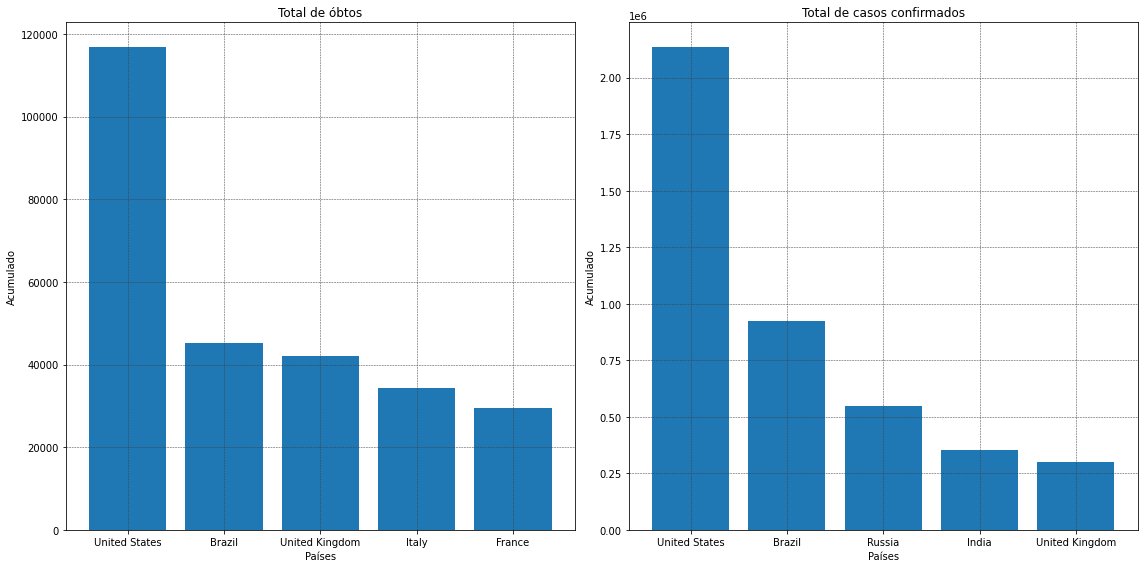

In [ ]:
x = df_death.location
y = df_death.total_deaths

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

# Gráfico 1

ax[0].grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)
ax[0].bar(x, y)
ax[0].set_title("Total de óbtos")
ax[0].set_xlabel("Países")
ax[0].set_ylabel("Acumulado")

#Gráfico 2

x1 = df_cases.location
y2 = df_cases.total_cases

ax[1].grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)
ax[1].bar(x1, y1)
ax[1].set_title("Total de casos confirmados")
ax[1].set_xlabel("Países")
ax[1].set_ylabel("Acumulado")

plt.tight_layout()

Até o dia 17/06, o Brasil é o segundo pais com mais indice de óbitos por coronavirus, atrás apenas dos Estados Unidos como mostram os gráficos. São mais de `40.000` mortes confirmadas. Em seguida vem Reino unido, Itália e França.

Nos números de casos confirmados não é diferente, ficando atrás também dos Estados Unidos com um pouco mais de `900.000` casos confirmados. Em seguida vem Rússia, India e Reino Unido.

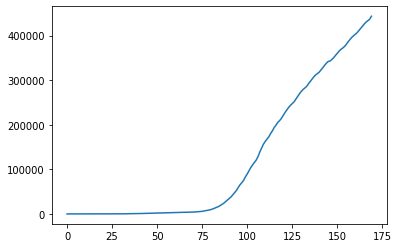

In [ ]:
df_evol = df.loc[df.location == "World", "total_deaths"].reset_index(drop=True).plot()
df_evol;

In [ ]:
df_d = df.loc[df.date == '2020-06-17', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[0:1].copy()
df_c = df.loc[df.date == '2020-06-17', ['location', 'total_cases']].sort_values(by="total_cases", ascending=False)[0:1].copy()

indice = (df_d.total_deaths / df_c.total_cases) * 100
indice

24378    5.446831
dtype: float64

A nível mundo, o coronavírus cresceu de forma bastante rápida. São mais de `400.000` mortes confirmadas, isso nos dá um indice de mortalidade de 5.44%

##Conclusão

Ocorona virus vem avançando bastante rápido, poucos países coneguiram controlar seu avanço, são muitos fatores que podem influenciar as ações para contê-lo. Políticas de saúde, isolamento social, conciência da população, higiene. Independente de qual país seja, se todos fizerem sua parte, logo essa doença irá sser controlada.